In [1]:
# pip install MetaTrader5
# pip install --upgrade MetaTrader5
# pip install TA-Lib

In [62]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import time
import pytz
import calendar
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
from datetime import datetime, date
import talib

In [63]:
IST = pytz.timezone("Asia/Kolkata")

In [64]:
LOGIN    = 123456789              # <-- replace with your MT5 account number
PASSWORD = "dummy_password"       # <-- replace with your MT5 password
SERVER   = "Demo-MT5Server"

In [65]:
if not mt5.initialize():
    print("⚠️ First attempt failed, trying with credentials...")

    if not mt5.initialize(login=LOGIN, password=PASSWORD, server=SERVER):
        print("❌ Initialize failed, error:", mt5.last_error())
        mt5.shutdown()
        quit()
    else:
        print("✅ Connected to account:", mt5.account_info().login)
else:
    print("✅ Connected (already logged in) to account:", mt5.account_info().login)

✅ Connected (already logged in) to account: 274154149


In [66]:
def account_info():
    account_info = mt5.account_info()
    if account_info is not None:
        print("--- Account Info ---")
        print("Login ID:", account_info.login)
        print("Server:", account_info.server)
        print("Account Name:", account_info.name)
        print("Currency:", account_info.currency)
        print("Leverage:", account_info.leverage)
        print("Balance:", account_info.balance)
        print("Equity:", account_info.equity)
        print("Margin:", account_info.margin)
        print("Free Margin:", account_info.margin_free)
        print("Profit:", account_info.profit)
    else:
        print("❌ Failed to retrieve account info")
account_info()

--- Account Info ---
Login ID: 274154149
Server: Exness-MT5Trial6
Account Name: Standard
Currency: USD
Leverage: 500
Balance: 1000.0
Equity: 1000.0
Margin: 0.0
Free Margin: 1000.0
Profit: 0.0


In [67]:
symbols = mt5.symbols_get()
print("No of Total symbols:", len(symbols))
symbols_name = [s.name for s in symbols if "XAU" in s.name or "GOLD" in s.name]
print("symbols name available on Broker:", symbols_name)

No of Total symbols: 400
symbols name available on Broker: ['BTCXAUm', 'XAUAUDm', 'XAUEURm', 'XAUGBPm', 'XAUUSDm']


In [68]:
TOP_20_GLOBAL = [ "EURUSD", "USDJPY", "GBPUSD", "USDCHF", "USDCAD",
                 "AUDUSD", "NZDUSD", "XAUUSD", "XAGUSD",    
                 "USDINR", "BTCUSD", "ETHUSD", "HK50"]
def map_global_to_broker(top_symbols):
    if not mt5.initialize():
        print("❌ Initialize failed:", mt5.last_error())
        return {}

    broker_symbols = [s.name for s in mt5.symbols_get()]
    mapping = {}

    for sym in top_symbols:
        # find broker symbol containing the global symbol
        matches = [bs for bs in broker_symbols if sym in bs]
        mapping[sym] = matches if matches else ["❌ Not available"]

    mt5.shutdown()
    return mapping

# Example usage
symbol_map = map_global_to_broker(TOP_20_GLOBAL)

print("🌍 Global → Broker Symbol Mapping:\n")
for k, v in symbol_map.items():
    print(f"{k} → {v}")

🌍 Global → Broker Symbol Mapping:

EURUSD → ['EURUSDm']
USDJPY → ['USDJPYm']
GBPUSD → ['GBPUSDm']
USDCHF → ['USDCHFm']
USDCAD → ['USDCADm']
AUDUSD → ['AUDUSDm']
NZDUSD → ['NZDUSDm']
XAUUSD → ['XAUUSDm']
XAGUSD → ['XAGUSDm']
USDINR → ['USDINR', 'USDINRm']
BTCUSD → ['BTCUSDm']
ETHUSD → ['ETHUSDm']
HK50 → ['HK50m']


In [69]:
def stream_live_data(symbol: str, interval: int = 1):
    
    if not mt5.initialize():
        print("❌ Initialize failed, error:", mt5.last_error())
        return
    
    # Select symbol
    if not mt5.symbol_select(symbol, True):
        print(f"❌ Failed to select {symbol}")
        mt5.shutdown()
        return
    
    print(f"✅ Streaming live data for {symbol}...\nPress Ctrl+C to stop.\n")
    
    try:
        while True:
            info = mt5.symbol_info(symbol)
            if info is not None:
                print(
                    f"Symbol: {info.name} | Bid: {info.bid} | Ask: {info.ask} | "
                    f"Spread: {info.spread} | Digits: {info.digits}"
                )
            else:
                print(f"⚠️ Failed to retrieve {symbol} info")

            time.sleep(interval)  # wait before next update

    except KeyboardInterrupt:
        print("\n⏹️ Streaming stopped by user")
    
    finally:
        #mt5.shutdown()

In [10]:
symbol = "BTCUSDm"
stream_live_data(symbol, interval=1)

✅ Streaming live data for BTCUSDm...
Press Ctrl+C to stop.

Symbol: BTCUSDm | Bid: 115705.59 | Ask: 115723.59 | Spread: 1800 | Digits: 2
Symbol: BTCUSDm | Bid: 115707.46 | Ask: 115725.46 | Spread: 1800 | Digits: 2
Symbol: BTCUSDm | Bid: 115705.4 | Ask: 115723.4 | Spread: 1800 | Digits: 2

⏹️ Streaming stopped by user


In [70]:
#Printing a structured table of all instruments (400 in your case) with their trading properties and live prices.
if not mt5.initialize():
    print("❌ MT5 initialize failed:", mt5.last_error())
    quit()

# Get all symbols available
symbols = mt5.symbols_get()

# Extract useful fields into list of dicts
data = []
for s in symbols:
    data.append({
        "symbol": s.name,
        "path": s.path,
        "description": s.description,
        "spread": s.spread,
        "digits": s.digits,
        "point": s.point,
        "trade_contract_size": s.trade_contract_size,
        "margin_initial": s.margin_initial,
        "margin_maintenance": s.margin_maintenance,
        "trade_mode": s.trade_mode,
        "bid": s.bid,
        "ask": s.ask,
    })

# Convert into DataFrame
df = pd.DataFrame(data)
print(f"\n✅ Printing a structured table of all {len(df)} instruments "
      f"with their trading properties and live prices:\n")
df.head(2)


✅ Printing a structured table of all 400 instruments with their trading properties and live prices:



,symbol,path,description,spread,digits,point,trade_contract_size,margin_initial,margin_maintenance,trade_mode,bid,ask
0,USDRUB,Forex_Indicator\USDRUB,US Dollar vs Russian Ruble,102029,4,0.00010,100000.0,0.0,0.0,0,94.82570,105.0286
1,USDAED,Forex_Indicator\USDAED,US Dollar vs United Arab Emirates Dirham,104,5,0.00001,100000.0,0.0,0.0,0,3.67236,3.6734


In [71]:
def mt5_init(login: int, password: str, server: str) -> bool:
    if mt5.initialize(login=login, password=password, server=server):
        print("✅ mt5.initialize() OK")
        return True
    else:
        err = mt5.last_error()
        print(f"❌ mt5.initialize failed or login failed: {err}")
        return False

ok = mt5_init(LOGIN, PASSWORD, SERVER)
if not ok:
    raise SystemExit("Initialization / login failed.")

✅ mt5.initialize() OK


In [72]:
# =============================
# Cell 5 - Timeframe Utility
# =============================
time = ["M1", "M2", "M3", "M4", "M5", "M6", "M10",
        "M12", "M15", "M20", "M30", "H1", "H2", "H3",
        "H4", "H6", "H8", "H12", "D1", "W1", "MN1"]
def tf_str_to_const(tf: str):

    mapping = {
        "M1": mt5.TIMEFRAME_M1,
        "M2": mt5.TIMEFRAME_M2,
        "M3": mt5.TIMEFRAME_M3,
        "M4": mt5.TIMEFRAME_M4,
        "M5": mt5.TIMEFRAME_M5,
        "M6": mt5.TIMEFRAME_M6,
        "M10": mt5.TIMEFRAME_M10,
        "M12": mt5.TIMEFRAME_M12,
        "M15": mt5.TIMEFRAME_M15,
        "M20": mt5.TIMEFRAME_M20,
        "M30": mt5.TIMEFRAME_M30,
        "H1": mt5.TIMEFRAME_H1,
        "H2": mt5.TIMEFRAME_H2,
        "H3": mt5.TIMEFRAME_H3,
        "H4": mt5.TIMEFRAME_H4,
        "H6": mt5.TIMEFRAME_H6,
        "H8": mt5.TIMEFRAME_H8,
        "H12": mt5.TIMEFRAME_H12,
        "D1": mt5.TIMEFRAME_D1,
        "W1": mt5.TIMEFRAME_W1,
        "MN1": mt5.TIMEFRAME_MN1,
    }
    return mapping.get(tf.upper())

In [73]:
def split_by_month(start,end):
    ranges=[]
    current=start
    while current<=end:
        # Find last day of current month
        last_day=calendar.monthrange(current.year,current.month)[1]
        chunk_end=datetime(current.year,current.month,last_day)
        # Ensure end doesn't go beyond requested end date
        if chunk_end>end:chunk_end=end
        # Save current chunk as (start_date,end_date) strings
        ranges.append((current.strftime("%Y-%m-%d"),chunk_end.strftime("%Y-%m-%d")))
        # Move to first day of next month
        current=chunk_end+timedelta(days=1)
    return ranges

In [74]:

def get_candle_ranges(start_date:str, end_date:str, timeframe:str, printing:bool=False):
    
    # Convert input strings / dates to datetime object
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    elif isinstance(start_date, date) and not isinstance(start_date, datetime):
        start_date = datetime.combine(start_date, datetime.min.time())
    
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    elif isinstance(end_date, date) and not isinstance(end_date, datetime):
        end_date = datetime.combine(end_date, datetime.min.time())
    
    # Count total days (inclusive)
    start = start_date
    end = end_date
    days=(end-start).days+1
    # Map MT5 timeframe to minutes
    minutes_map={"M1":1,"M2":2,"M3":3,"M4":4,"M5":5,"M6":6,
                 "M10":10,"M12":12,"M15":15,"M20":20,"M30":30,
                 "H1":60,"H2":120,"H3":180,"H4":240,"H6":360,
                 "H8":480,"H12":720,"D1":1440,"W1":10080,"MN1":43200}
    
    if timeframe not in minutes_map:raise ValueError(f"Unsupported timeframe: {timeframe}")
    # Total candles = total minutes divided by timeframe length
    
    total_minutes  = days*24*60
    num_of_candles = total_minutes//minutes_map[timeframe]
    
    if printing:
        print(f"Number of days: {days}")
        print(f"Number of candles: {num_of_candles}")
    # If too many candles, split into smaller monthly ranges
    
    if num_of_candles > 10000:
        ranges=split_by_month(start,end)
        if printing:
            print("Monthly Ranges:")
            for i, (start, end) in enumerate(ranges, 1):
                # ensure datetime objects
                if isinstance(start, str):
                    start = datetime.strptime(start, "%Y-%m-%d")
                if isinstance(end, str):
                    end = datetime.strptime(end, "%Y-%m-%d")
                
                length = (end - start).days + 1  # inclusive days
                print(f"Range {i}: {start.strftime('%Y-%m-%d')} → {end.strftime('%Y-%m-%d')} | Length: {length} days")
        return days, num_of_candles, ranges
    
    ranges = [(start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))]
    if printing:
        length = (end - start).days + 1
        print(f"Range 1: {start.strftime('%Y-%m-%d')} → {end.strftime('%Y-%m-%d')} | Length: {length} days")
        #print(f"Range {i}: {start.strftime('%Y-%m-%d')} → {end.strftime('%Y-%m-%d')} | Length: {length} days")
    # Otherwise just return summary
    return days, num_of_candles, ranges

In [75]:
start_date = "2025-01-01"
end_date = datetime.now().date()
# end_date = "2025-09-19"
Timeframe = "M1"
printing = True
days, num_candles, ranges = get_candle_ranges(start_date, end_date, Timeframe, printing=True)

Number of days: 264
Number of candles: 380160
Monthly Ranges:
Range 1: 2025-01-01 → 2025-01-31 | Length: 31 days
Range 2: 2025-02-01 → 2025-02-28 | Length: 28 days
Range 3: 2025-03-01 → 2025-03-31 | Length: 31 days
Range 4: 2025-04-01 → 2025-04-30 | Length: 30 days
Range 5: 2025-05-01 → 2025-05-31 | Length: 31 days
Range 6: 2025-06-01 → 2025-06-30 | Length: 30 days
Range 7: 2025-07-01 → 2025-07-31 | Length: 31 days
Range 8: 2025-08-01 → 2025-08-31 | Length: 31 days
Range 9: 2025-09-01 → 2025-09-21 | Length: 21 days


In [76]:
def _process_rates(rates):
    """Helper to convert MT5 rates to DataFrame"""
    if rates is None or len(rates) == 0:
        return pd.DataFrame()
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    #df.sort_values("time").reset_index(drop=True)
    return df

In [77]:
def fetch_from_pos(symbol: str, timeframe: str, pos: int, count: int):
    tf_const = tf_str_to_const(timeframe)
    rates = mt5.copy_rates_from_pos(symbol, tf_const, pos, count)
    return _process_rates(rates)

In [78]:
def fetch_from(symbol: str, timeframe, date_from: datetime, count: int):
    """Fetch bars using copy_rates_from"""
    tf_const = tf_str_to_const(timeframe)
    rates = mt5.copy_rates_from(symbol, timeframe, date_from, count)
    return _process_rates(rates)

In [79]:
def fetch_from_range(symbol: str, timeframe, date_from: datetime, date_to: datetime):
    """Fetch bars using copy_rates_range"""
    timeframe = tf_str_to_const(timeframe)
    rates = mt5.copy_rates_range(symbol, timeframe, date_from, date_to)
    return _process_rates(rates)

In [80]:
def historical_data(symbol, timeframe, start_date, end_date, printing = True):  
    # Convert only if input is string
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    timeframe = timeframe.upper()
    # Initialize MT5
    if not mt5.initialize():
        print("❌ Initialize failed, error:", mt5.last_error())
        return None, None

    # Select symbol
    if not mt5.symbol_select(symbol, True):
        print(f"❌ Failed to select {symbol}")
        mt5.shutdown()
        return None, None
    
    # days, num_candles, date_ranges
    days, num_candles, date_ranges = get_candle_ranges(start_date, end_date, timeframe, printing = printing)       
    all_rates = []
    timeframe = tf_str_to_const(timeframe)
    for start, end in date_ranges:
        start = datetime.strptime(start, "%Y-%m-%d")
        end   = datetime.strptime(end, "%Y-%m-%d")
        rates = mt5.copy_rates_range(symbol, timeframe, start, end)

        if rates is not None and len(rates) > 0:
            all_rates.extend(rates.tolist())
        else:
            print(f"⚠️ No data returned for {symbol} from {start} to {end}")
    
    # ✅ Define expected columns explicitly
    cols = ["time","open","high","low","close","tick_volume","spread","real_volume"]
    df = pd.DataFrame(all_rates, columns=cols)

    if not df.empty:
        df['time'] = pd.to_datetime(df['time'], unit='s', utc=True)
        df.drop_duplicates(subset="time", inplace=True)
        df.sort_values("time", inplace=True)
        df.reset_index(drop=True, inplace=True)
    else:
        print("⚠️ Empty DataFrame. No rates collected.")

    #mt5.shutdown()
    return df, (days, num_candles, date_ranges)

In [81]:
def merge_historical_with_latest(historical_df: pd.DataFrame, symbol: str, timeframe: str, pos: int = 0, count: int = 5000) -> pd.DataFrame:

    historical_df['time'] = pd.to_datetime(historical_df['time']).dt.tz_localize(None)
    
    latest_data = fetch_from_pos(symbol, timeframe, pos, count)  # assume this function exists
    
    if latest_data.empty:
        print("No latest data fetched.")
        merged_df = historical_df
        num_duplicates = 0
    else:
        # Make latest data timezone-naive
        latest_data['time'] = pd.to_datetime(latest_data['time']).dt.tz_localize(None)
        
        # Merge / concatenate
        merged_df = pd.concat([historical_df, latest_data], ignore_index=True)
        
        # Count duplicates before dropping
        num_duplicates = merged_df.duplicated(subset='time').sum()
        print(f"Number of duplicate rows based on 'time': {num_duplicates}")
        
        # Drop duplicates based on 'time'
        merged_df = merged_df.drop_duplicates(subset='time', keep='last').reset_index(drop=True)
    
    merged_df['time'] = pd.to_datetime(merged_df['time'], unit='s', errors='coerce') 
    merged_df['time'] = merged_df['time'].dt.tz_localize("UTC").dt.tz_convert(IST)  
    print(f"Merged DataFrame shape after removing duplicates: {merged_df.shape}")
    
    return merged_df

In [82]:
time = ["M1", "M2", "M3", "M4", "M5", "M6", "M10",
        "M12", "M15", "M20", "M30", "H1", "H2","H3", 
        "H4", "H6", "H8", "H12", "D1", "W1", "MN1"]

symbol = "XAUUSDm"
start_date = "2018-01-01"
#end_date = "2025-09-19"
end_date = datetime.now().date()
# start_date = datetime.strptime(start_date,"%Y-%m-%d")
# end_date = datetime.strptime(end_date,"%Y-%m-%d")
timeframe = "H1"
printing = False

# days, num_candles, ranges = get_candle_ranges(start_date, end_date, Timeframe, printing=True)
df, ranges = historical_data(symbol, timeframe, start_date, end_date, printing = printing)
df = merge_historical_with_latest(df, symbol, timeframe, pos=0, count=5000)
df.head()

Number of duplicate rows based on 'time': 4841
Merged DataFrame shape after removing duplicates: (25195, 8)


,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-06-28 05:30:00+05:30,1252.884,1254.229,1245.910,1248.581,81353.0,0,0.0
1,2018-06-29 05:30:00+05:30,1248.551,1255.573,1245.978,1252.533,79160.0,0,0.0
2,2018-07-01 05:30:00+05:30,1253.020,1254.149,1252.785,1253.365,2202.0,0,0.0
3,2018-07-02 05:30:00+05:30,1253.329,1253.576,1239.648,1242.103,75367.0,0,0.0
4,2018-07-03 05:30:00+05:30,1242.105,1256.819,1237.914,1254.923,76943.0,0,0.0


In [83]:
df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
25190,2025-09-19 21:30:00+05:30,3670.710,3673.260,3666.602,3668.310,7812.0,160,0.0
25191,2025-09-19 22:30:00+05:30,3668.273,3679.481,3668.090,3678.604,7374.0,160,0.0
25192,2025-09-19 23:30:00+05:30,3678.595,3684.127,3678.192,3683.612,6325.0,160,0.0
25193,2025-09-20 00:30:00+05:30,3683.653,3685.203,3681.302,3684.444,5662.0,160,0.0
25194,2025-09-20 01:30:00+05:30,3684.353,3685.053,3680.846,3684.861,4004.0,160,0.0


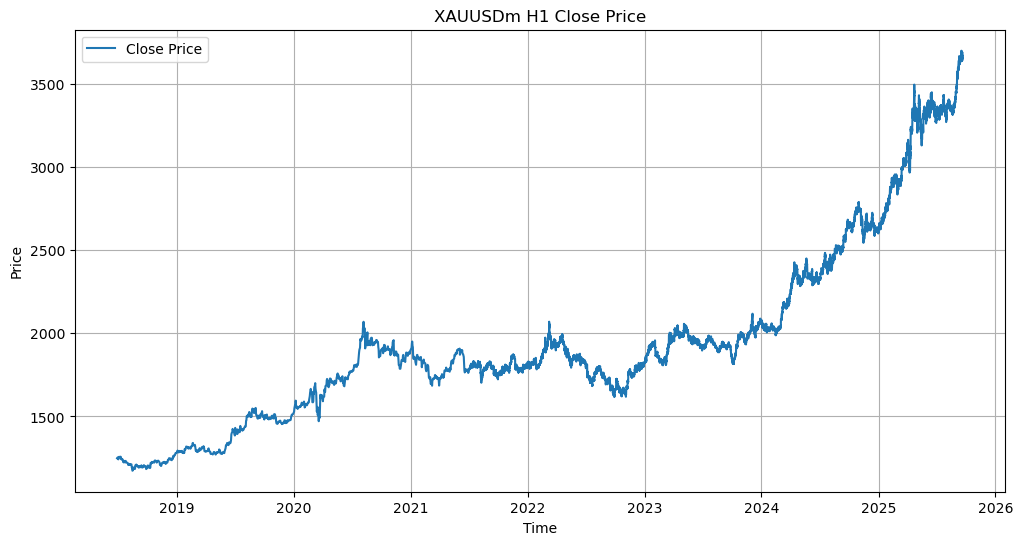

In [84]:
# =============================
# Cell 7 - Plot Graph
# =============================
plt.figure(figsize=(12,6))
plt.plot(df["time"], df['close'], label='Close Price')
plt.title(f"{symbol} {timeframe} Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

output_notebook()

p = figure(x_axis_type="datetime", title=f"{symbol} {timeframe} Close Price", width=1000, height=500)
p.line(df.index, df['close'], line_width=2)

hover = HoverTool(tooltips=[("Time", "@x{%F %T}"), ("Price", "@y")], formatters={'@x': 'datetime'})
p.add_tools(hover)

show(p)

Loading BokehJS ...

In [86]:
TOP_20_GLOBAL = [ "EURUSD", "USDJPY", "GBPUSD", "USDCHF", "USDCAD",
                 "AUDUSD", "NZDUSD", "XAUUSD", "XAGUSD",    
                 "USDINR", "BTCUSD", "ETHUSD", "HK50"]
def map_global_to_broker(top_symbols):
    if not mt5.initialize():
        print("❌ Initialize failed:", mt5.last_error())
        return {}

    broker_symbols = [s.name for s in mt5.symbols_get()]
    mapping = {}

    for sym in top_symbols:
        # find broker symbol containing the global symbol
        matches = [bs for bs in broker_symbols if sym in bs]
        mapping[sym] = matches if matches else ["❌ Not available"]

    mt5.shutdown()
    return mapping

# Example usage
symbol_map = map_global_to_broker(TOP_20_GLOBAL)

print("🌍 Global → Broker Symbol Mapping:\n")
for k, v in symbol_map.items():
    print(f"{k} → {v}")

🌍 Global → Broker Symbol Mapping:

EURUSD → ['EURUSDm']
USDJPY → ['USDJPYm']
GBPUSD → ['GBPUSDm']
USDCHF → ['USDCHFm']
USDCAD → ['USDCADm']
AUDUSD → ['AUDUSDm']
NZDUSD → ['NZDUSDm']
XAUUSD → ['XAUUSDm']
XAGUSD → ['XAGUSDm']
USDINR → ['USDINR', 'USDINRm']
BTCUSD → ['BTCUSDm']
ETHUSD → ['ETHUSDm']
HK50 → ['HK50m']


In [87]:
time = ["M1", "M2", "M3", "M4", "M5", "M6", "M10",
        "M12", "M15", "M20", "M30", "H1", "H2","H3", 
        "H4", "H6", "H8", "H12", "D1", "W1", "MN1"]

symbol = "USDJPYm"
start_date = "2018-01-01"
#end_date = "2025-09-19"
end_date = datetime.now().date()
# start_date = datetime.strptime(start_date,"%Y-%m-%d")
# end_date = datetime.strptime(end_date,"%Y-%m-%d")
timeframe = "M15"
printing = False

# days, num_candles, ranges = get_candle_ranges(start_date, end_date, Timeframe, printing=True)
df, ranges = historical_data(symbol, timeframe, start_date, end_date, printing = printing)
df = merge_historical_with_latest(df, symbol, timeframe, pos=0, count=5000)

Number of duplicate rows based on 'time': 4905
Merged DataFrame shape after removing duplicates: (96779, 8)


In [88]:
df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-09-16 18:30:00+05:30,109.690,109.753,109.682,109.724,373.0,8,0.0
1,2021-09-16 18:45:00+05:30,109.723,109.776,109.706,109.750,449.0,8,0.0
2,2021-09-16 19:00:00+05:30,109.752,109.823,109.752,109.771,572.0,8,0.0
3,2021-09-16 19:15:00+05:30,109.770,109.795,109.651,109.666,481.0,8,0.0
4,2021-09-16 19:30:00+05:30,109.666,109.708,109.623,109.628,544.0,8,0.0


In [89]:
df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
96774,2025-09-20 01:15:00+05:30,147.933,147.959,147.917,147.939,423.0,10,0.0
96775,2025-09-20 01:30:00+05:30,147.939,147.980,147.931,147.976,226.0,10,0.0
96776,2025-09-20 01:45:00+05:30,147.976,147.988,147.947,147.958,249.0,10,0.0
96777,2025-09-20 02:00:00+05:30,147.960,147.985,147.939,147.963,457.0,10,0.0
96778,2025-09-20 02:15:00+05:30,147.963,147.981,147.925,147.960,656.0,10,0.0


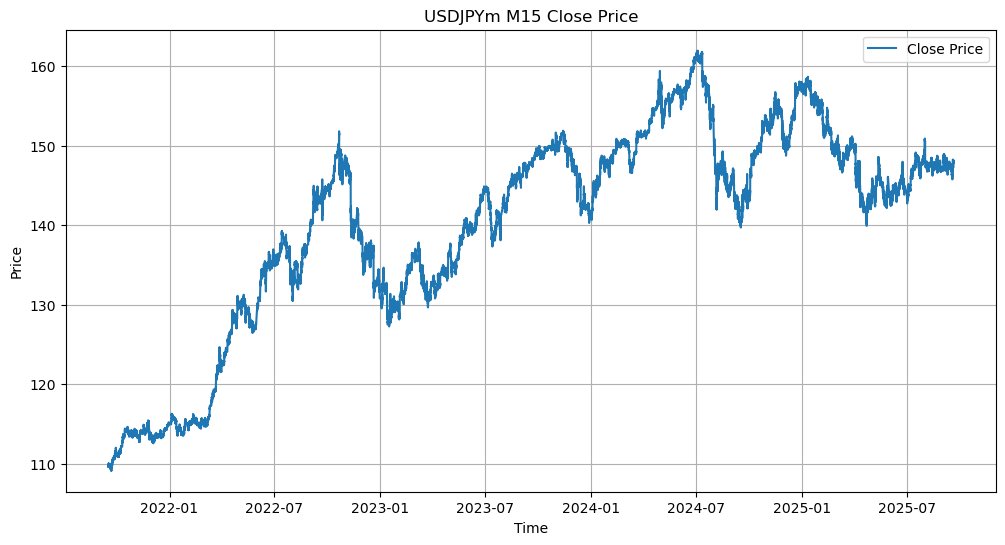

In [90]:
plt.figure(figsize=(12,6))
plt.plot(df["time"], df['close'], label='Close Price')
plt.title(f"{symbol} {timeframe} Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# df = merge_historical_with_latest(df, symbol, timeframe, pos=0, count=5000)

In [92]:
# ===============================
# 1. Indicators
# ===============================
def add_indicators(df):
    # Moving Averages
    df['MA50'] = talib.SMA(df['close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['close'], timeperiod=200)
    
    # RSI
    df['RSI'] = talib.RSI(df['close'], timeperiod=14)
    
    # MACD
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
        df['close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    
    # Bollinger Bands
    df['UpperBB'], df['MiddleBB'], df['LowerBB'] = talib.BBANDS(
        df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    return df

In [93]:
# ===============================
# 2. Strategy Logic
# ===============================
def generate_signals(df, stop_loss=0.02, take_profit=0.05):
    """
    Strategy:
    - Buy when MA50 > MA200, RSI > 50, MACD > Signal, and price above Middle Bollinger
    - Sell when MA50 < MA200, RSI < 50, MACD < Signal, and price below Middle Bollinger
    - Includes stop-loss and take-profit handling
    """
    df['Signal'] = 0
    
    buy_condition = (
        (df['MA50'] > df['MA200']) &
        (df['RSI'] > 50) &
        (df['MACD'] > df['MACD_signal']) &
        (df['close'] > df['MiddleBB'])
    )
    
    sell_condition = (
        (df['MA50'] < df['MA200']) &
        (df['RSI'] < 50) &
        (df['MACD'] < df['MACD_signal']) &
        (df['close'] < df['MiddleBB'])
    )
    
    df.loc[buy_condition, 'Signal'] = 1
    df.loc[sell_condition, 'Signal'] = -1
    
    # Position
    #df['Position'] = df['Signal'].replace(to_replace=0, method='ffill').fillna(0)
    df['Position'] = df['Signal'].replace(0, np.nan).ffill().fillna(0)
    # Returns
    df['Return'] = df['close'].pct_change()
    df['Strategy'] = df['Position'].shift(1) * df['Return']
    
    # Apply Stop Loss & Take Profit per trade
    trade_returns = []
    for r in df['Strategy']:
        if r < -stop_loss:       # stop loss hit
            trade_returns.append(-stop_loss)
        elif r > take_profit:    # take profit hit
            trade_returns.append(take_profit)
        else:
            trade_returns.append(r)
    df['Strategy'] = trade_returns
    
    return df

In [94]:
# 3. Backtest & PnL
# ===============================
def backtest(df, initial_capital=100000):
    df['Equity'] = initial_capital * (1 + df['Strategy'].cumsum())
    df['BuyHold'] = initial_capital * (1 + df['Return'].cumsum())
    
    # Final stats
    final_capital = df['Equity'].iloc[-1]
    profit_abs = final_capital - initial_capital
    profit_pct = (profit_abs / initial_capital) * 100
    
    # Trade statistics
    trades = df[df['Signal'] != 0]  # where signals are generated
    total_trades = len(trades)
    
    # Approximate winning trades: positive Strategy return on signal bars
    winning_trades = len(trades[trades['Strategy'] > 0])
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
    
    # Print summary
    print("===== Strategy Performance =====")
    print(f"Initial Capital : {initial_capital:.2f}")
    print(f"Final Capital   : {final_capital:.2f}")
    print(f"Total Profit    : {profit_abs:.2f} ({profit_pct:.2f}%)")
    print(f"Total Trades    : {total_trades}")
    print(f"Winning Trades  : {winning_trades}")
    print(f"Win Rate        : {win_rate:.2f}%")
    
    return df


In [95]:
# ===============================
# 4. Plot Equity Curve
# ===============================
def plot_equity(df, initial_capital=100000):
    plt.figure(figsize=(14,6))
    plt.plot(df['time'], df['Equity'], label="Strategy Equity", linewidth=2, color="blue")
    plt.plot(df['time'], df['BuyHold'], label="Buy & Hold", linestyle='--', color="orange")
    plt.axhline(initial_capital, linestyle='--', color='red', label='Initial Capital')
    plt.title("Paper Trading Strategy - Equity Curve")
    plt.xlabel("Time")
    plt.ylabel("Equity (Portfolio Value)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [96]:

# ===============================
# 5. Run Everything
# ===============================
# Example: assume df has 'time' and 'close' columns
# df = pd.read_csv("data.csv", parse_dates=['time'])

initial_capital = 100000
stoploss_pct = 0.02   # 2%
takeprofit_pct = 0.05 # 5%
df = add_indicators(df)
df = generate_signals(df, stop_loss=stoploss_pct, take_profit=takeprofit_pct)
df = backtest(df, initial_capital=initial_capital)

===== Strategy Performance =====
Initial Capital : 100000.00
Final Capital   : 112770.37
Total Profit    : 12770.37 (12.77%)
Total Trades    : 33079
Winning Trades  : 19725
Win Rate        : 59.63%


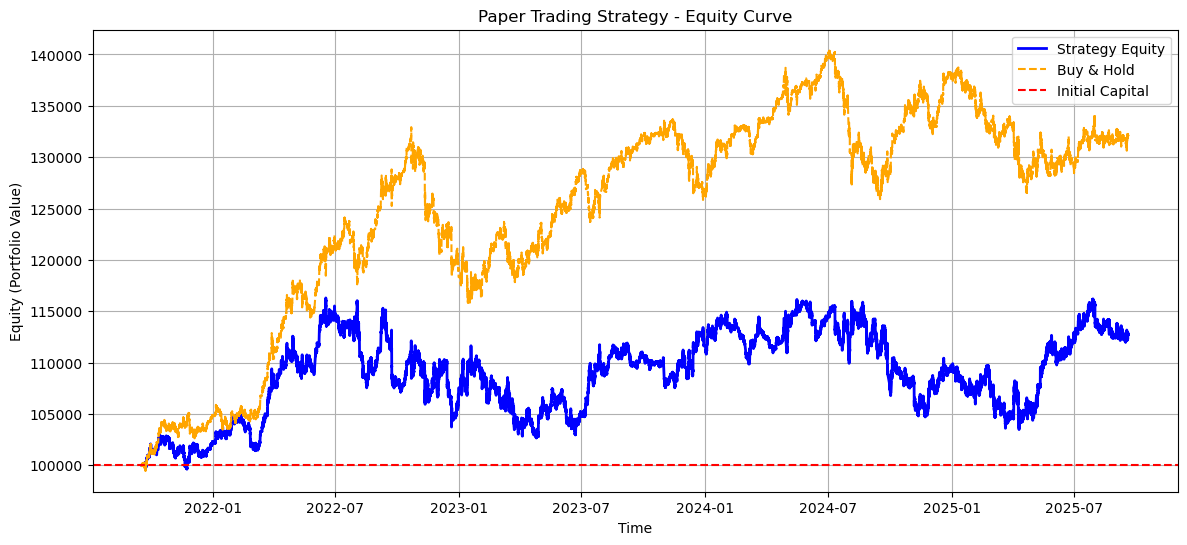

In [56]:
plot_equity(df, initial_capital=initial_capital)